## Multiple Disease Prediction System - 3.) Heart Disease

In [3]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
#Reading The Data Using Pandas Library (Data From A csv File Into A Pandas Dataframe)

data=pd.read_csv("/content/Heart Disease.csv")

### Dataset Link:https://www.kaggle.com/datasets/zeeshanmulla/heart-disease-dataset

In [5]:
#Check The Type Of Data

type(data)

pandas.core.frame.DataFrame

In [6]:
#Basic Information About The Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Renaming The Columns

data=data.rename(columns={"age":"Age","sex":"Sex","cp":"CP","trestbps":"Rest BP","chol":"Cholestrol","fbs":"Fasting Blood Sugar","restecg":"Rest ECG","thalach":"Max HR","exang":"Exercised Induced Angina","oldpeak":"Oldpeak","slope":"Slope","ca":"Number Of Major Vessels","thal":"Thalassemia Value","target":"Target"})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       303 non-null    int64  
 1   Sex                       303 non-null    int64  
 2   CP                        303 non-null    int64  
 3   Rest BP                   303 non-null    int64  
 4   Cholestrol                303 non-null    int64  
 5   Fasting Blood Sugar       303 non-null    int64  
 6   Rest ECG                  303 non-null    int64  
 7   Max HR                    303 non-null    int64  
 8   Exercised Induced Angina  303 non-null    int64  
 9   Oldpeak                   303 non-null    float64
 10  Slope                     303 non-null    int64  
 11  Number Of Major Vessels   303 non-null    int64  
 12  Thalassemia Value         303 non-null    int64  
 13  Target                    303 non-null    int64  
dtypes: float64

In [9]:
data.head()

,Age,Sex,CP,Rest BP,Cholestrol,Fasting Blood Sugar,Rest ECG,Max HR,Exercised Induced Angina,Oldpeak,Slope,Number Of Major Vessels,Thalassemia Value,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.tail()

,Age,Sex,CP,Rest BP,Cholestrol,Fasting Blood Sugar,Rest ECG,Max HR,Exercised Induced Angina,Oldpeak,Slope,Number Of Major Vessels,Thalassemia Value,Target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
#To Get The Statistical Insight From The Dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
CP,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Rest BP,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting Blood Sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Rest ECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max HR,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercised Induced Angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
#Checking Missing Values In The Dataset

data.isnull().sum()

Age                         0
Sex                         0
CP                          0
Rest BP                     0
Cholestrol                  0
Fasting Blood Sugar         0
Rest ECG                    0
Max HR                      0
Exercised Induced Angina    0
Oldpeak                     0
Slope                       0
Number Of Major Vessels     0
Thalassemia Value           0
Target                      0
dtype: int64

In [13]:
#To See How Many Target States Are There In The Dataset

data["Target"].value_counts()

1    165
0    138
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

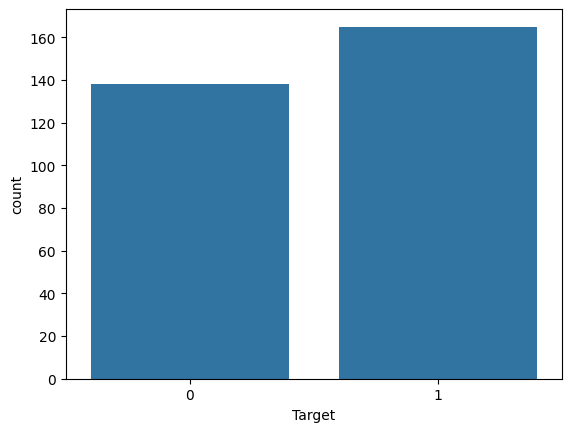

In [14]:
#Plotting The Count Plot Of Target

sns.countplot(x="Target",data=data)

0=No Heart Disease,
1=Heart Disease

<ipython-input-15-e5e3d5e18961>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Target"])


<Axes: xlabel='Target', ylabel='Density'>

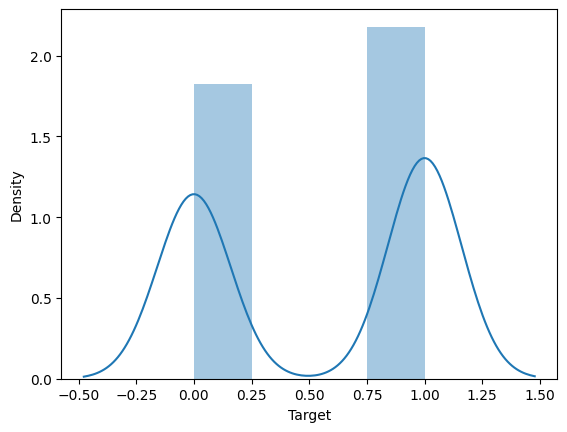

In [15]:
#Plotting The Distribution Plot Of Target

sns.distplot(data["Target"])

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'CP'}>,
        <Axes: title={'center': 'Rest BP'}>],
       [<Axes: title={'center': 'Cholestrol'}>,
        <Axes: title={'center': 'Fasting Blood Sugar'}>,
        <Axes: title={'center': 'Rest ECG'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercised Induced Angina'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'Slope'}>,
        <Axes: title={'center': 'Number Of Major Vessels'}>],
       [<Axes: title={'center': 'Thalassemia Value'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

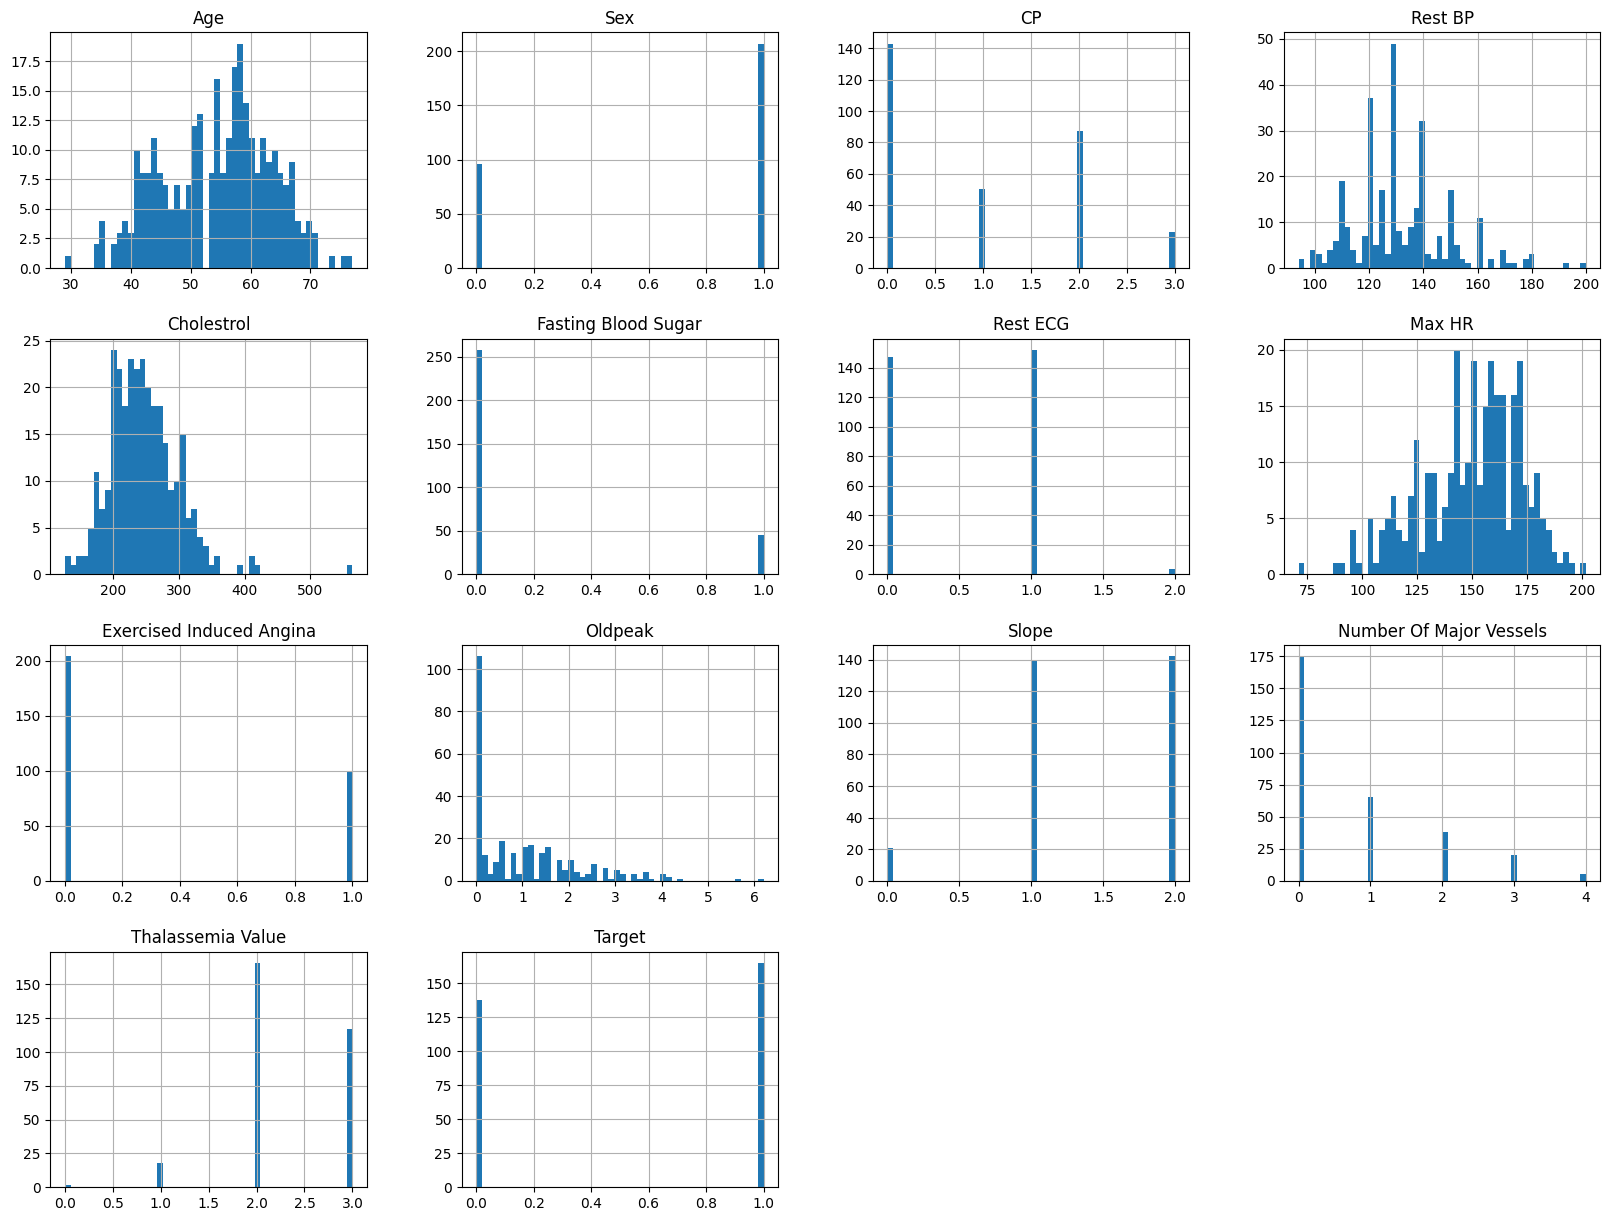

In [16]:
#Plotting The Histogram Of The Various Features

data.hist(bins=50,figsize=(20,15))

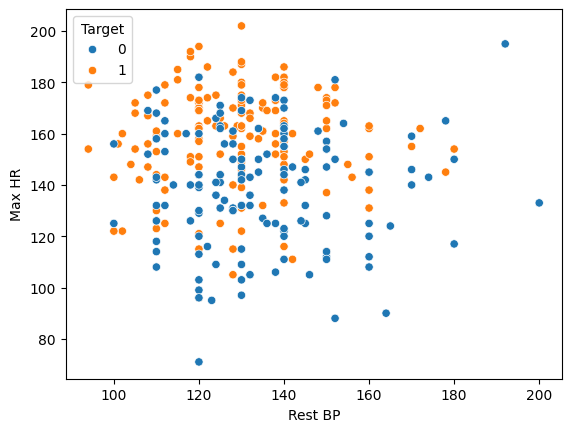

In [17]:
#Plotting The Scatterplot By Projecting Target Based on Two Features Rest BP And Max HR

sns.scatterplot(data=data,x="Rest BP",y="Max HR",hue="Target")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

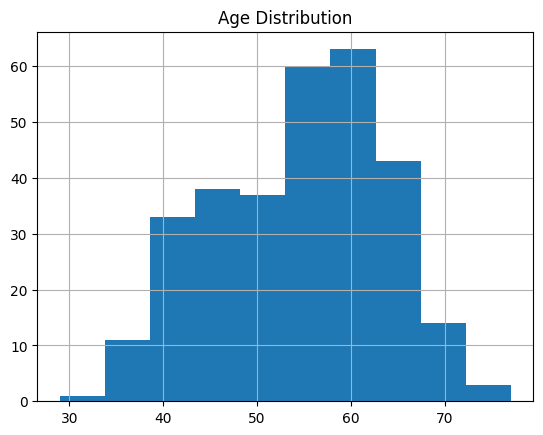

In [18]:
#Plotting The Age Distribution

data["Age"].hist().plot(kind="bar")
plt.title("Age Distribution")

In [19]:
data["Sex"].value_counts()

1    207
0     96
Name: Sex, dtype: int64

0=Female,
1=Male

In [20]:
#To Find Correlation Among The Columns In The Dataframe

corr_matrix=data.corr()
corr_matrix

,Age,Sex,CP,Rest BP,Cholestrol,Fasting Blood Sugar,Rest ECG,Max HR,Exercised Induced Angina,Oldpeak,Slope,Number Of Major Vessels,Thalassemia Value,Target
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
CP,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Rest BP,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting Blood Sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Rest ECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Max HR,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercised Induced Angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


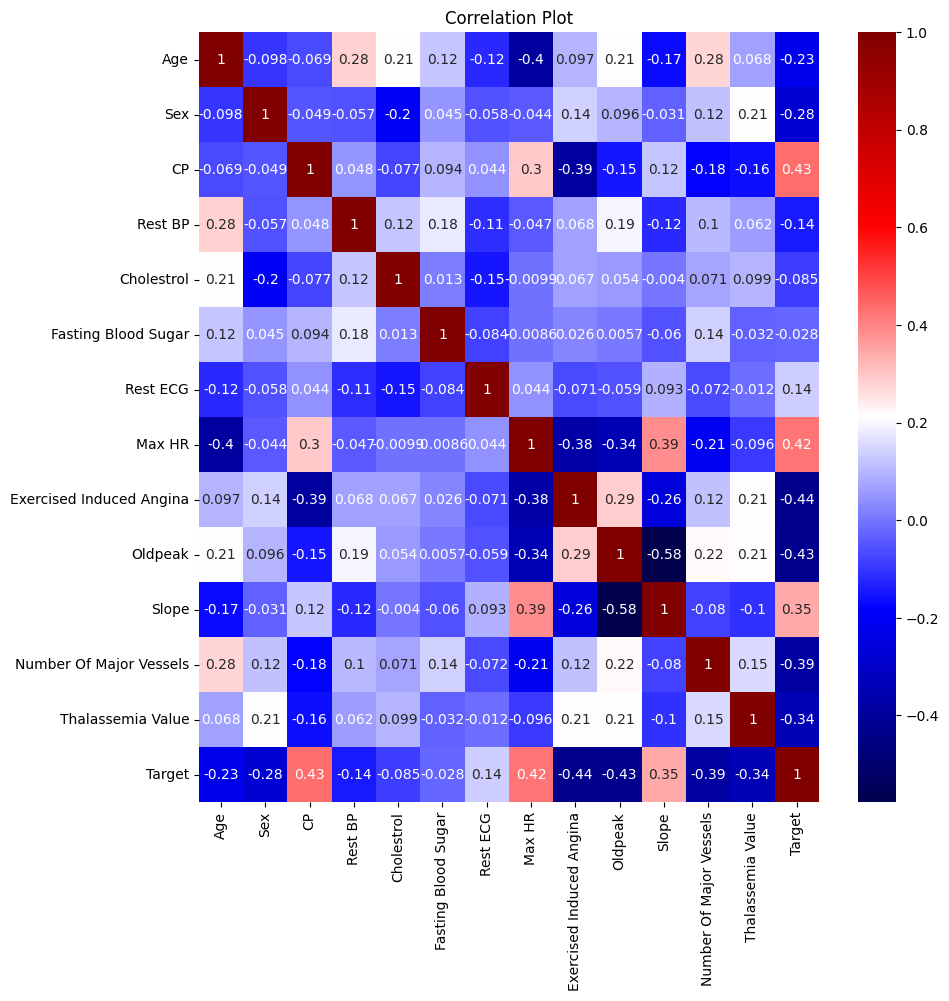

In [21]:
#Plotting The Heatmap

plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),annot=True,cmap="seismic")
plt.show()

In [22]:
#Finding The Variables Which Has The Highest Correlation With The Target Variable (Target)

corr_matrix["Target"].sort_values(ascending=False)

Target                      1.000000
CP                          0.433798
Max HR                      0.421741
Slope                       0.345877
Rest ECG                    0.137230
Fasting Blood Sugar        -0.028046
Cholestrol                 -0.085239
Rest BP                    -0.144931
Age                        -0.225439
Sex                        -0.280937
Thalassemia Value          -0.344029
Number Of Major Vessels    -0.391724
Oldpeak                    -0.430696
Exercised Induced Angina   -0.436757
Name: Target, dtype: float64

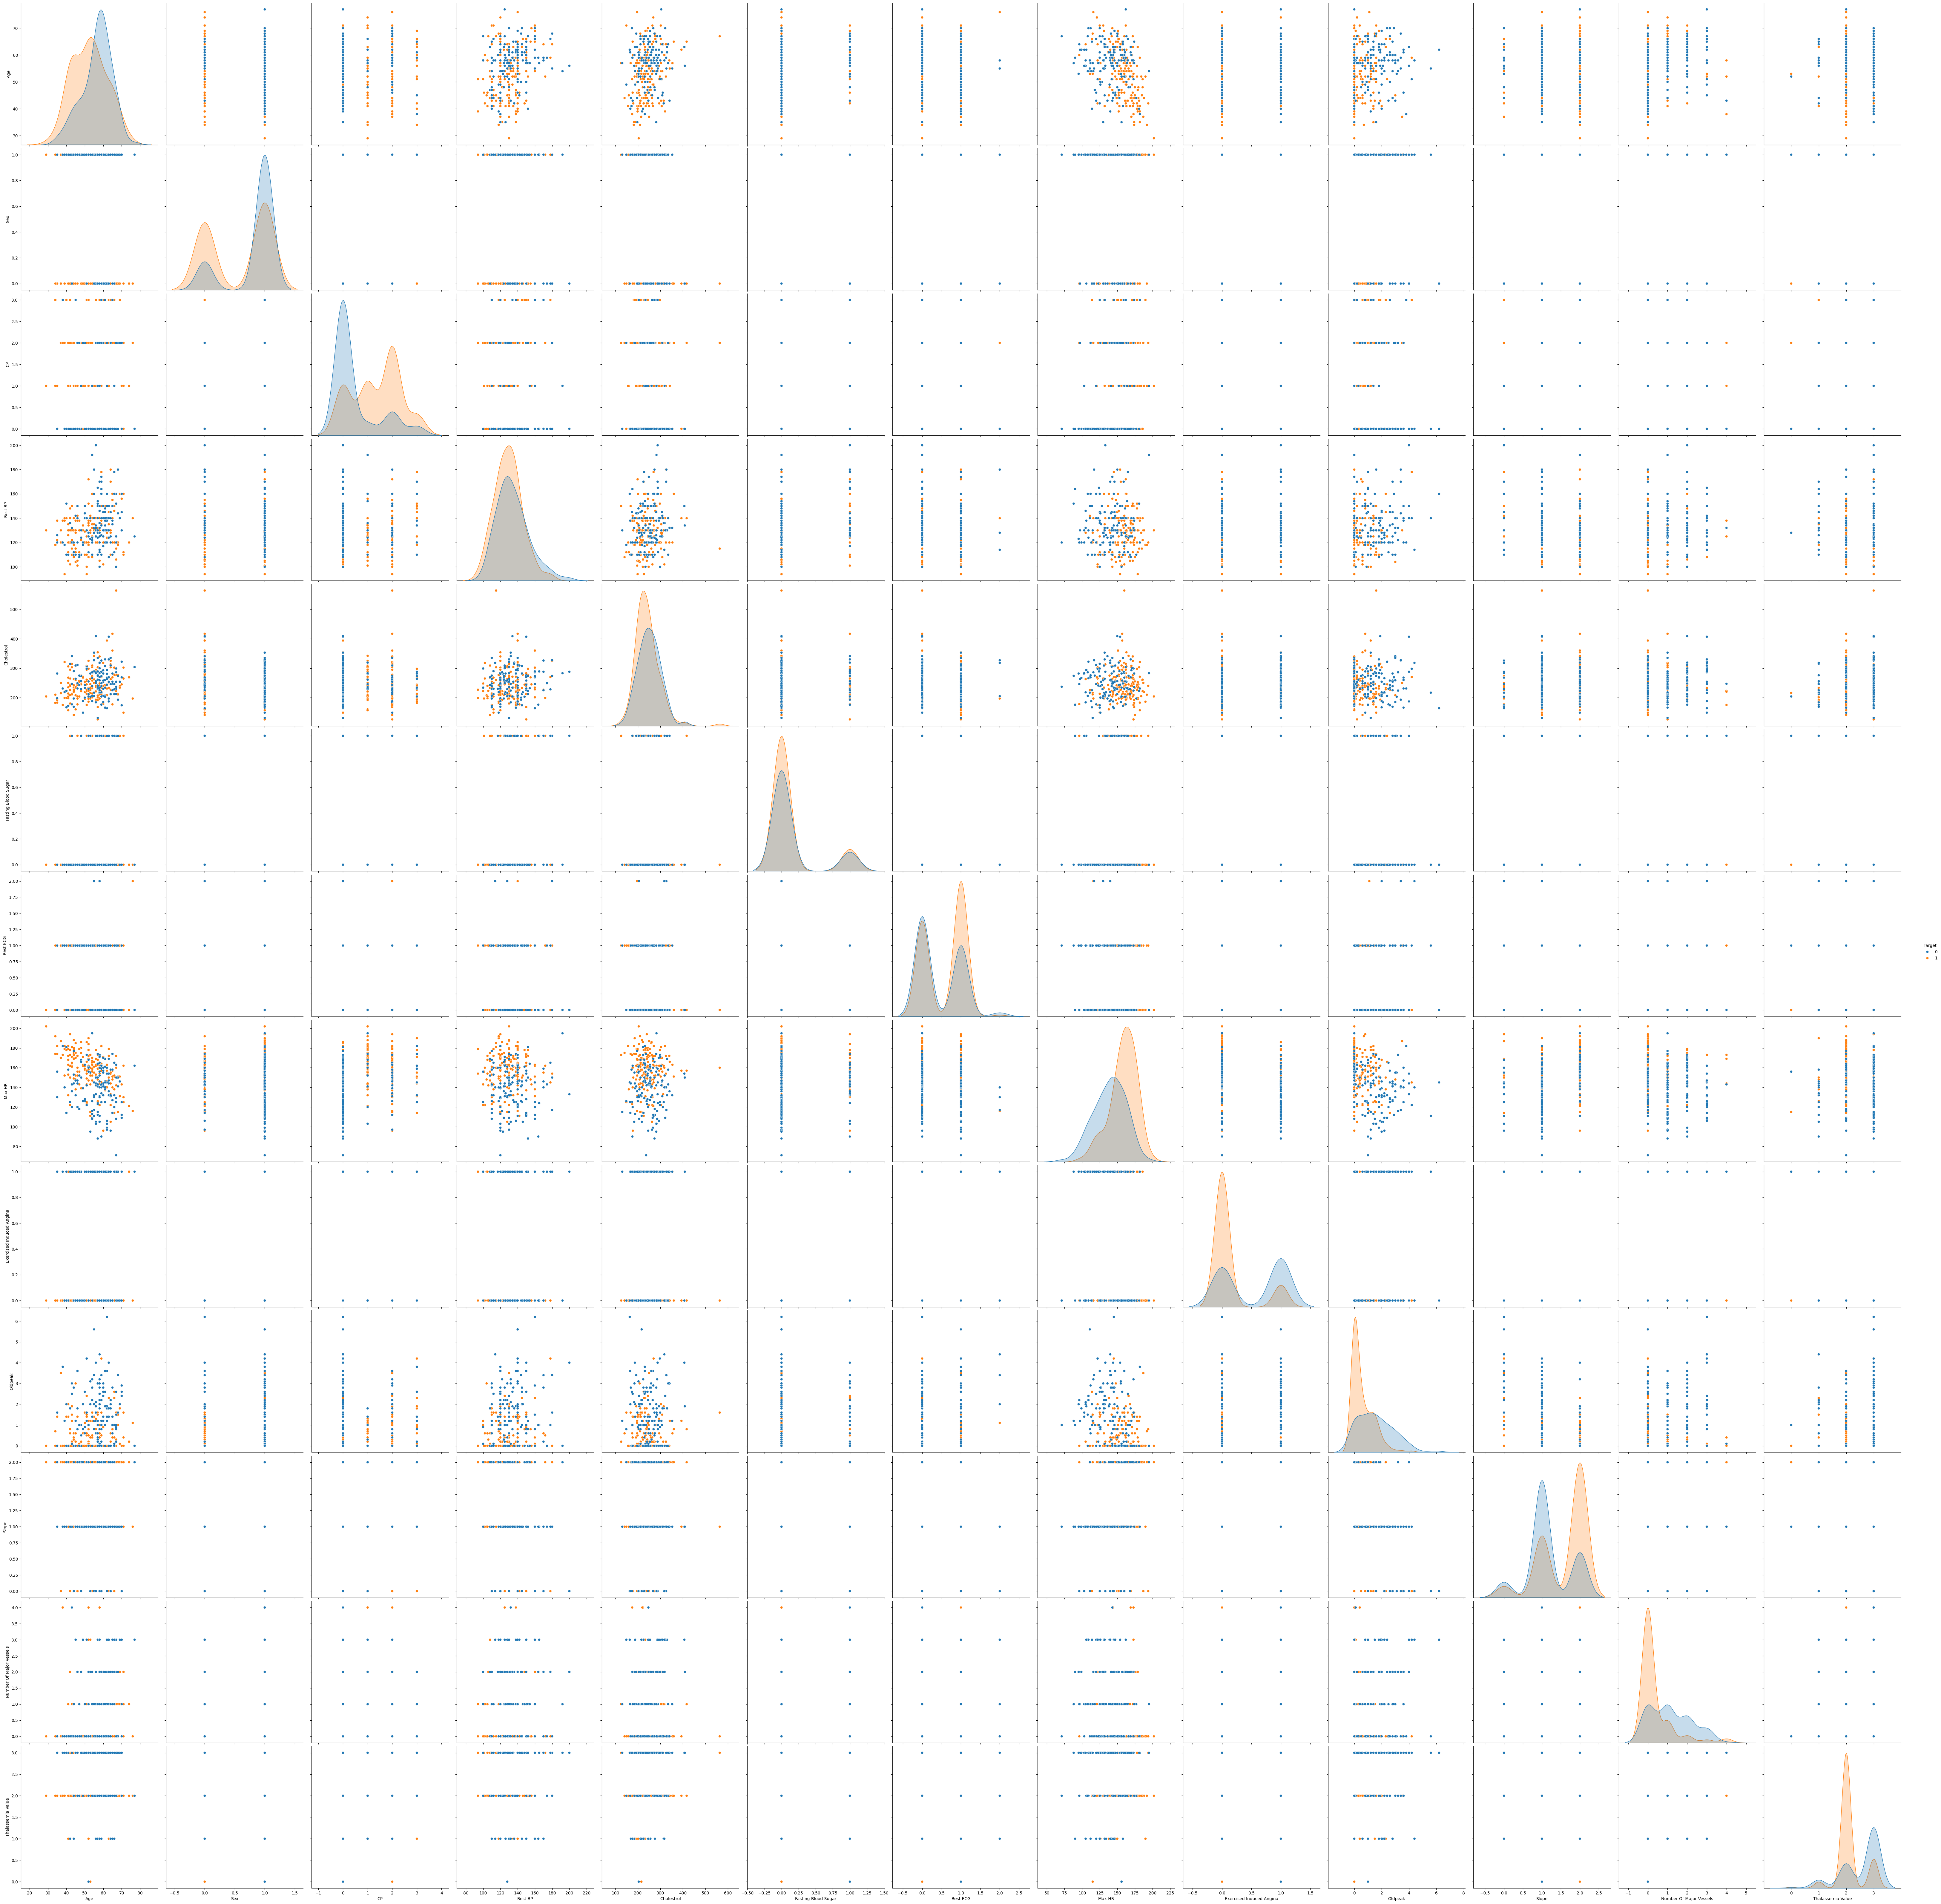

In [23]:
#Plotting The Pairplot Of Target

sns.pairplot(data=data,hue="Target",height=5)
plt.show()

In [24]:
#Categorizing The Data

x=data.drop(columns=["Target"],axis=1)
y=data.Target

In [25]:
#Splitting The Data Into Training Set And Test Set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [26]:
#Scaling The Data

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [27]:
#Decision Tree Classifier

In [28]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_pred1=dtc.predict(x_test)
print(y_pred1)

[1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0]


In [30]:
a1=accuracy_score(y_test,y_pred1)
p1=precision_score(y_test,y_pred1)
r1=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [31]:
print("Accuracy   :", a1)
print("Precision  :", p1)
print("Recall     :", r1)
print("F1-Score   :", f1)

Accuracy   : 0.8351648351648352
Precision  : 0.8125
Recall     : 0.8666666666666667
F1-Score   : 0.8387096774193549


In [32]:
#K-Nearest Neigbour Classifier

In [33]:
knnc=KNeighborsClassifier(n_neighbors=8)
knnc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
y_pred2=knnc.predict(x_test)
print(y_pred2)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0]


In [35]:
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2)
r2=recall_score(y_test,y_pred2)
f2=f1_score(y_test,y_pred2)

In [36]:
print("Accuracy   :", a2)
print("Precision  :", p2)
print("Recall     :", r2)
print("F1-Score   :", f2)

Accuracy   : 0.8461538461538461
Precision  : 0.8444444444444444
Recall     : 0.8444444444444444
F1-Score   : 0.8444444444444444


In [37]:
#Logistic Regression

In [38]:
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred3=logr.predict(x_test)
print(y_pred3)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0]


In [40]:
a3=accuracy_score(y_test,y_pred3)
p3=precision_score(y_test,y_pred3)
r3=recall_score(y_test,y_pred3)
f3=f1_score(y_test,y_pred3)

In [41]:
print("Accuracy   :", a3)
print("Precision  :", p3)
print("Recall     :", r3)
print("F1-Score   :", f3)

Accuracy   : 0.8571428571428571
Precision  : 0.82
Recall     : 0.9111111111111111
F1-Score   : 0.8631578947368421


In [42]:
#Naive Bayes Algorithm

In [43]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [44]:
y_pred4=nbc.predict(x_test)
print(y_pred4)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0]


In [45]:
a4=accuracy_score(y_test,y_pred4)
p4=precision_score(y_test,y_pred4)
r4=recall_score(y_test,y_pred4)
f4=f1_score(y_test,y_pred4)

In [46]:
print("Accuracy   :", a4)
print("Precision  :", p4)
print("Recall     :", r4)
print("F1-Score   :", f4)

Accuracy   : 0.8791208791208791
Precision  : 0.8541666666666666
Recall     : 0.9111111111111111
F1-Score   : 0.8817204301075269


In [47]:
#Neural Network Classifier

In [48]:
nnc=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nnc.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [49]:
y_pred5=nnc.predict(x_test)
print(y_pred5)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0]


In [50]:
a5=accuracy_score(y_test,y_pred5)
p5=precision_score(y_test,y_pred5)
r5=recall_score(y_test,y_pred5)
f5=f1_score(y_test,y_pred5)

In [51]:
print("Accuracy   :", a5)
print("Precision  :", p5)
print("Recall     :", r5)
print("F1-Score   :", f5)

Accuracy   : 0.8791208791208791
Precision  : 0.8695652173913043
Recall     : 0.8888888888888888
F1-Score   : 0.8791208791208792


In [52]:
#Random Forest

In [53]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_pred6=rfc.predict(x_test)
print(y_pred6)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0]


In [55]:
a6=accuracy_score(y_test,y_pred6)
p6=precision_score(y_test,y_pred6)
r6=recall_score(y_test,y_pred6)
f6=f1_score(y_test,y_pred6)

In [56]:
print("Accuracy   :", a6)
print("Precision  :", p6)
print("Recall     :", r6)
print("F1-Score   :", f6)

Accuracy   : 0.8571428571428571
Precision  : 0.8076923076923077
Recall     : 0.9333333333333333
F1-Score   : 0.8659793814432989


In [57]:
#Support Vector Machine

In [58]:
svm=SVC(kernel='poly',decision_function_shape='ovo')
svm.fit(x_train,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [59]:
y_pred7=svm.predict(x_test)
print(y_pred7)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0]


In [60]:
a7=accuracy_score(y_test,y_pred7)
p7=precision_score(y_test,y_pred7)
r7=recall_score(y_test,y_pred7)
f7=f1_score(y_test,y_pred7)

In [61]:
print("Accuracy   :", a7)
print("Precision  :", p7)
print("Recall     :", r7)
print("F1-Score   :", f7)

Accuracy   : 0.8351648351648352
Precision  : 0.7777777777777778
Recall     : 0.9333333333333333
F1-Score   : 0.8484848484848485


In [62]:
#XgBoost Classifier

In [63]:
xgc=GradientBoostingClassifier()
xgc.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred8=xgc.predict(x_test)
print(y_pred8)

[1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1]


In [65]:
a8=accuracy_score(y_test,y_pred8)
p8=precision_score(y_test,y_pred8)
r8=recall_score(y_test,y_pred8)
f8=f1_score(y_test,y_pred8)

In [66]:
print("Accuracy   :", a8)
print("Precision  :", p8)
print("Recall     :", r8)
print("F1-Score   :", f8)

Accuracy   : 0.8131868131868132
Precision  : 0.7692307692307693
Recall     : 0.8888888888888888
F1-Score   : 0.8247422680412372


In [67]:
#Comparing Accuracy Values

XgBoost 0.8131868131868132
Decision Tree 0.8351648351648352
Support Vector Machine 0.8351648351648352
K-Nearest Neighbor 0.8461538461538461
Logistic Regression 0.8571428571428571
Random Forest 0.8571428571428571
Naive Bayes 0.8791208791208791
Neural Network 0.8791208791208791


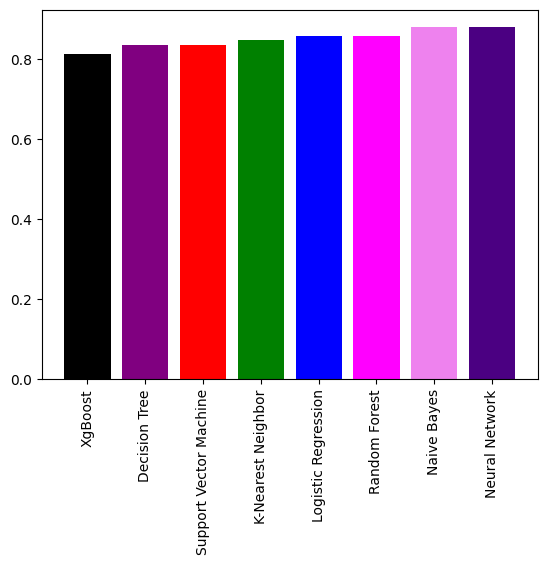

In [68]:
acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

sorted_models=sorted(acc_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

acc_keys,acc_values=zip(*sorted(zip(acc_models.keys(),acc_models.values()),key=lambda x:x[1]))

plt.bar(range(len(acc_models)),acc_values,tick_label=acc_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [69]:
#Comparing Precision Values

XgBoost 0.7692307692307693
Support Vector Machine 0.7777777777777778
Random Forest 0.8076923076923077
Decision Tree 0.8125
Logistic Regression 0.82
K-Nearest Neighbor 0.8444444444444444
Naive Bayes 0.8541666666666666
Neural Network 0.8695652173913043


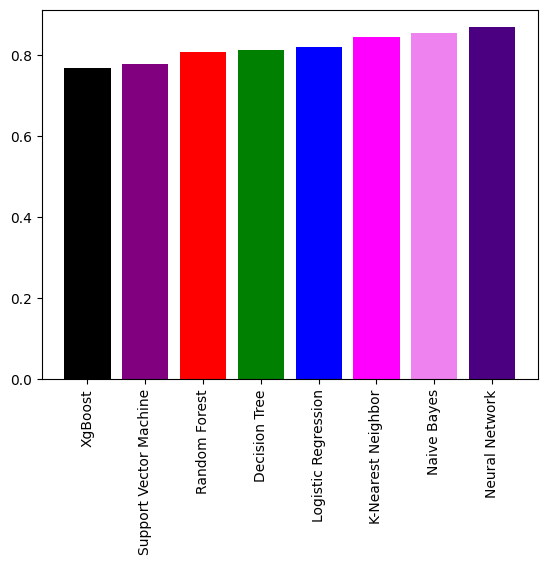

In [70]:
pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

sorted_models=sorted(pre_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

pre_keys,pre_values=zip(*sorted(zip(pre_models.keys(),pre_models.values()),key=lambda x:x[1]))

plt.bar(range(len(pre_models)),pre_values,tick_label=pre_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [71]:
#Comparing Recall Values

K-Nearest Neighbor 0.8444444444444444
Decision Tree 0.8666666666666667
Neural Network 0.8888888888888888
XgBoost 0.8888888888888888
Logistic Regression 0.9111111111111111
Naive Bayes 0.9111111111111111
Random Forest 0.9333333333333333
Support Vector Machine 0.9333333333333333


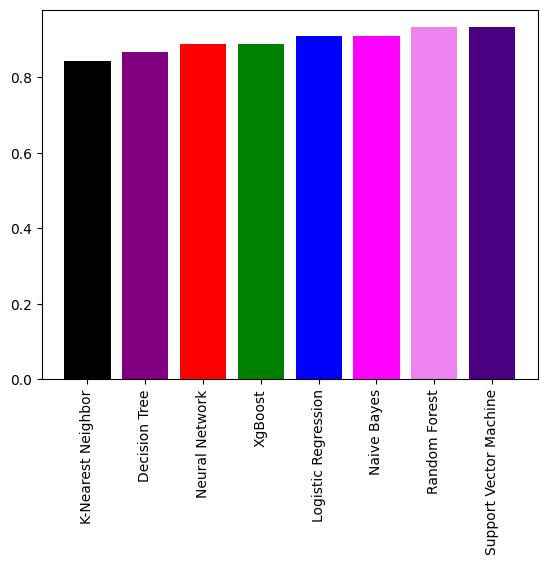

In [72]:
rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

sorted_models=sorted(rec_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

rec_keys,rec_values=zip(*sorted(zip(rec_models.keys(),rec_models.values()),key=lambda x:x[1]))

plt.bar(range(len(rec_models)),rec_values,tick_label=rec_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [73]:
#Comparing F1-Score

XgBoost 0.8247422680412372
Decision Tree 0.8387096774193549
K-Nearest Neighbor 0.8444444444444444
Support Vector Machine 0.8484848484848485
Logistic Regression 0.8631578947368421
Random Forest 0.8659793814432989
Neural Network 0.8791208791208792
Naive Bayes 0.8817204301075269


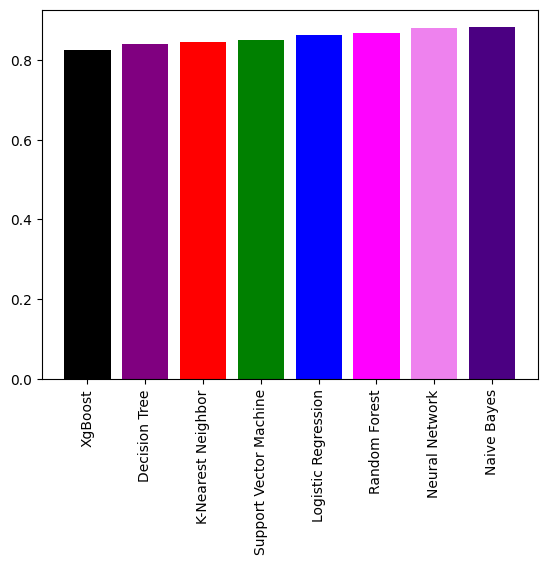

In [74]:
f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

sorted_models=sorted(f1_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

f1_keys,f1_values=zip(*sorted(zip(f1_models.keys(),f1_models.values()),key=lambda x:x[1]))

plt.bar(range(len(f1_models)),f1_values,tick_label=f1_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [75]:
#Plotting All Accuracy,Precision,Recall And F1-Score Of All The Models

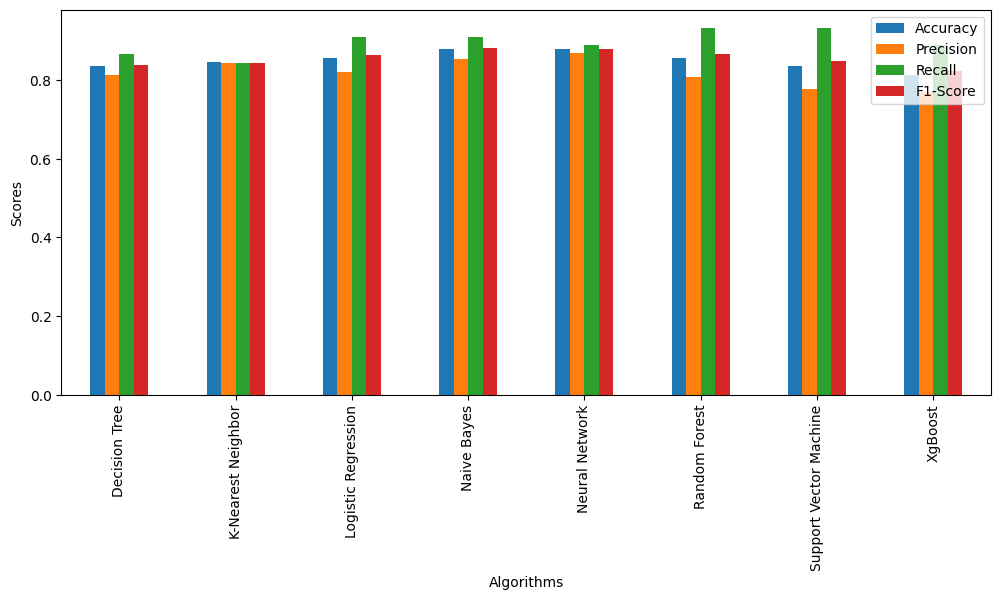

In [76]:
models_data=pd.DataFrame([["Decision Tree",a1,p1,r1,f1],["K-Nearest Neighbor",a2,p2,r2,f2],["Logistic Regression",a3,p3,r3,f3],["Naive Bayes",a4,p4,r4,f4],["Neural Network",a5,p5,r5,f5],["Random Forest",a6,p6,r6,f6],["Support Vector Machine",a7,p7,r7,f7],["XgBoost",a8,p8,r8,f8]],columns=["Scores","Accuracy","Precision","Recall","F1-Score"])
models_data.plot(x="Scores",kind="bar",stacked=False,xlabel="Algorithms",ylabel="Scores",figsize=(12,5))
plt.show()

In [77]:
#Saving The Trained Model

import pickle

filename="Heart_Disease.sav"
pickle.dump(nnc,open(filename,"wb"))

filename="Heart_Disease_Scale.sav"
pickle.dump(scale,open(filename,"wb"))

In [78]:
#Loading The Saved Model

loaded_model=pickle.load(open("Heart_Disease.sav","rb"))
loaded_model=pickle.load(open("Heart_Disease_Scale.sav","rb"))